### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda.
Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.


In [ ]:
# Ingreso total por tienda
ingreso_tienda = tienda["Precio"].sum()
ingreso_tienda_2 = tienda2["Precio"].sum()
ingreso_tienda_3 = tienda3["Precio"].sum()
ingreso_tienda_4 = tienda4["Precio"].sum()

# Mostramos los resultados
print(f"Ingreso total Tienda 1: ${ingreso_tienda:,.2f}")
print(f"Ingreso total Tienda 2: ${ingreso_tienda_2:,.2f}")
print(f"Ingreso total Tienda 3: ${ingreso_tienda_3:,.2f}")
print(f"Ingreso total Tienda 4: ${ingreso_tienda_4:,.2f}")

Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


# Gráfico


En este gráfico podemos observar cual fue el ingreso total que obtuvo cada tienda. Decidí crear un gráfico circular para una mejor visualización sobre el ingreso obtenido

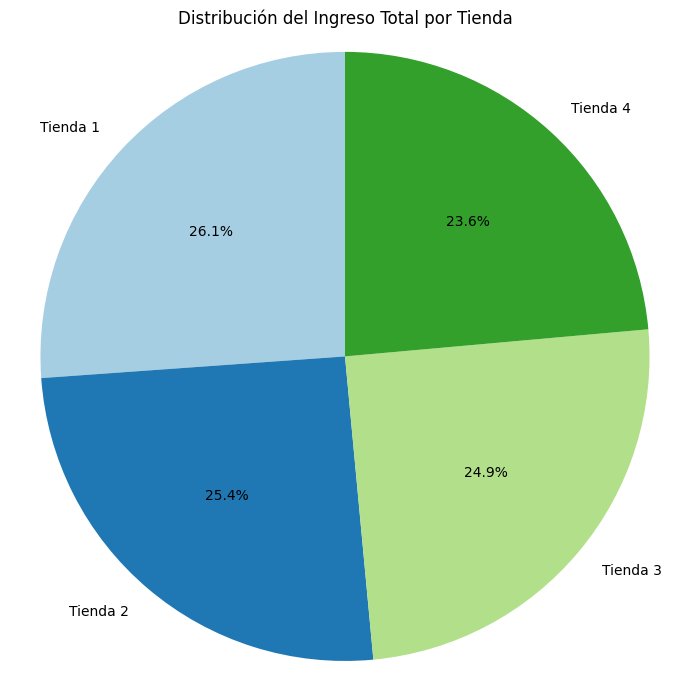

In [ ]:
import matplotlib.pyplot as plt

# Ingresos de cada tienda
ingresos = [ingreso_tienda, ingreso_tienda_2, ingreso_tienda_3, ingreso_tienda_4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfico de torta
plt.figure(figsize=(7,7))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución del Ingreso Total por Tienda')
plt.axis('equal')  # Para que el círculo sea perfecto
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [12]:
# Para cada tienda, contar la cantidad de productos por categoría
lista_tiendas= [(1,tienda),(2,tienda2),(3,tienda3),(4,tienda4)]
for i in lista_tiendas:
  print(f"\nTienda {i[0]} - Nro. de ventas por categoría:\n")
  venta_por_categoria= i[1].groupby('Categoría del Producto')['Producto'].count().reset_index(name="Número de ventas")
  print(venta_por_categoria)
  total_de_ventas= venta_por_categoria['Número de ventas'].sum()
  print(f"\nTotal de ventas: {total_de_ventas}")



Tienda 1 - Nro. de ventas por categoría:

    Categoría del Producto  Número de ventas
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465

Total de ventas: 2359

Tienda 2 - Nro. de ventas por categoría:

    Categoría del Producto  Número de ventas
0  Artículos para el hogar               181
1     Deportes y diversión               275
2        Electrodomésticos               305
3             Electrónicos               422
4   Instrumentos musicales               224
5                 Juguetes               313
6                   Libros               197
7                  Muebles               442

Total de ventas: 2359

Tienda 3 - Nro. de ventas por categoría:

    Categoría d

# Gráfico

En este gráfico podemos observar cuales son las categorías que obtuvieron más ventas

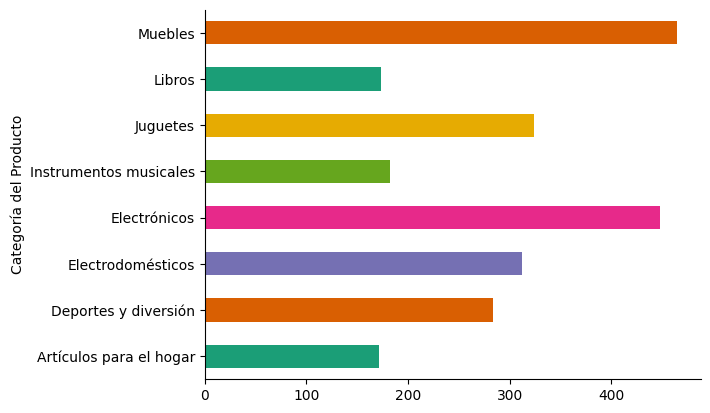

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
tienda.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [11]:
def calcular_calificacion(lista_tiendas):
  calificaciones_lista= []
  for i in lista_tiendas:
    calificacion_por_tienda= i[1]['Calificación'].mean().round(2)
    nombre= f"Tienda {i[0]}"
    calificaciones_lista.append({'Tienda': nombre, 'Calificación Promedio': calificacion_por_tienda})
    print(f'Calificación promedio {nombre}: {calificacion_por_tienda}')
  return calificaciones_lista
calificaciones_lista = calcular_calificacion(lista_tiendas)


Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.0


# Gráfico

En el siguiente gráfico se puede apreciar la calificación que posee cada tienda

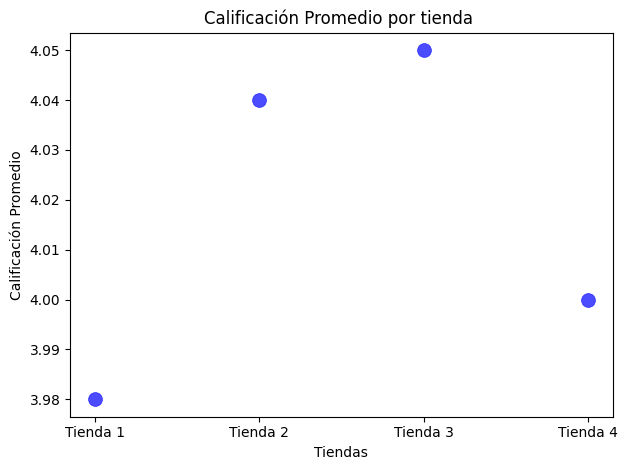

In [15]:
import matplotlib.pyplot as plt

def grafica_calificaciones(lista_tiendas):
  tiendas_label = [d['Tienda'] for d in calificaciones_lista]
  calificaciones_label = [d['Calificación Promedio'] for d in calificaciones_lista]

  plt.scatter(tiendas_label, calificaciones_label, color='blue', s=100, alpha=0.7, linewidth=0.5)
  plt.title('Calificación Promedio por tienda ')
  plt.xlabel('Tiendas')
  plt.ylabel('Calificación Promedio')
  plt.tight_layout()
  plt.show()

grafica_calificaciones(lista_tiendas)


# 4. Productos más y menos vendidos


En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
# Primero contamos la cantidad de productos que tenemos por tiendas

producto_tienda = tienda["Producto"].value_counts()
producto_tienda2 = tienda2["Producto"].value_counts()
producto_tienda3 = tienda3["Producto"].value_counts()
producto_tienda4 = tienda4["Producto"].value_counts()

# Calculamos los productos mas y menos vendidos
print("Tienda 1")
print("Producto más vendido:")
print(producto_tienda.idxmax(), "-", producto_tienda.max(), "ventas")
print("Producto menos vendido:")
print(producto_tienda.idxmin(), "-", producto_tienda.min(), "ventas")
print(" ")
print("Tienda 2")
print("Producto más vendido:")
print(producto_tienda2.idxmax(), "-", producto_tienda2.max(), "ventas")
print("Producto menos vendido:")
print(producto_tienda2.idxmin(), "-", producto_tienda2.min(), "ventas")
print(" ")
print("Tienda 3")
print("Producto más vendido: ")
print(producto_tienda3.idxmax(), "-", producto_tienda3.max(), "ventas")
print("Producto menos vendido:")
print(producto_tienda3.idxmin(), "-", producto_tienda3.min(), "ventas")
print(" ")
print("Tienda 4")
print("Producto más vendido: ")
print(producto_tienda4.idxmax(), "-", producto_tienda4.max(), "ventas")
print("Producto menos vendido:")
print(producto_tienda4.idxmin(), "-", producto_tienda4.min(), "ventas")

Tienda 1
Producto más vendido:
Microondas - 60 ventas
Producto menos vendido:
Auriculares con micrófono - 33 ventas
 
Tienda 2
Producto más vendido:
Iniciando en programación - 65 ventas
Producto menos vendido:
Juego de mesa - 32 ventas
 
Tienda 3
Producto más vendido: 
Kit de bancas - 57 ventas
Producto menos vendido:
Bloques de construcción - 35 ventas
 
Tienda 4
Producto más vendido: 
Cama box - 62 ventas
Producto menos vendido:
Guitarra eléctrica - 33 ventas


# Gráfico

En los siguientes gráficos podemos ver cuales son los productos más y menos vendidos por cada tienda

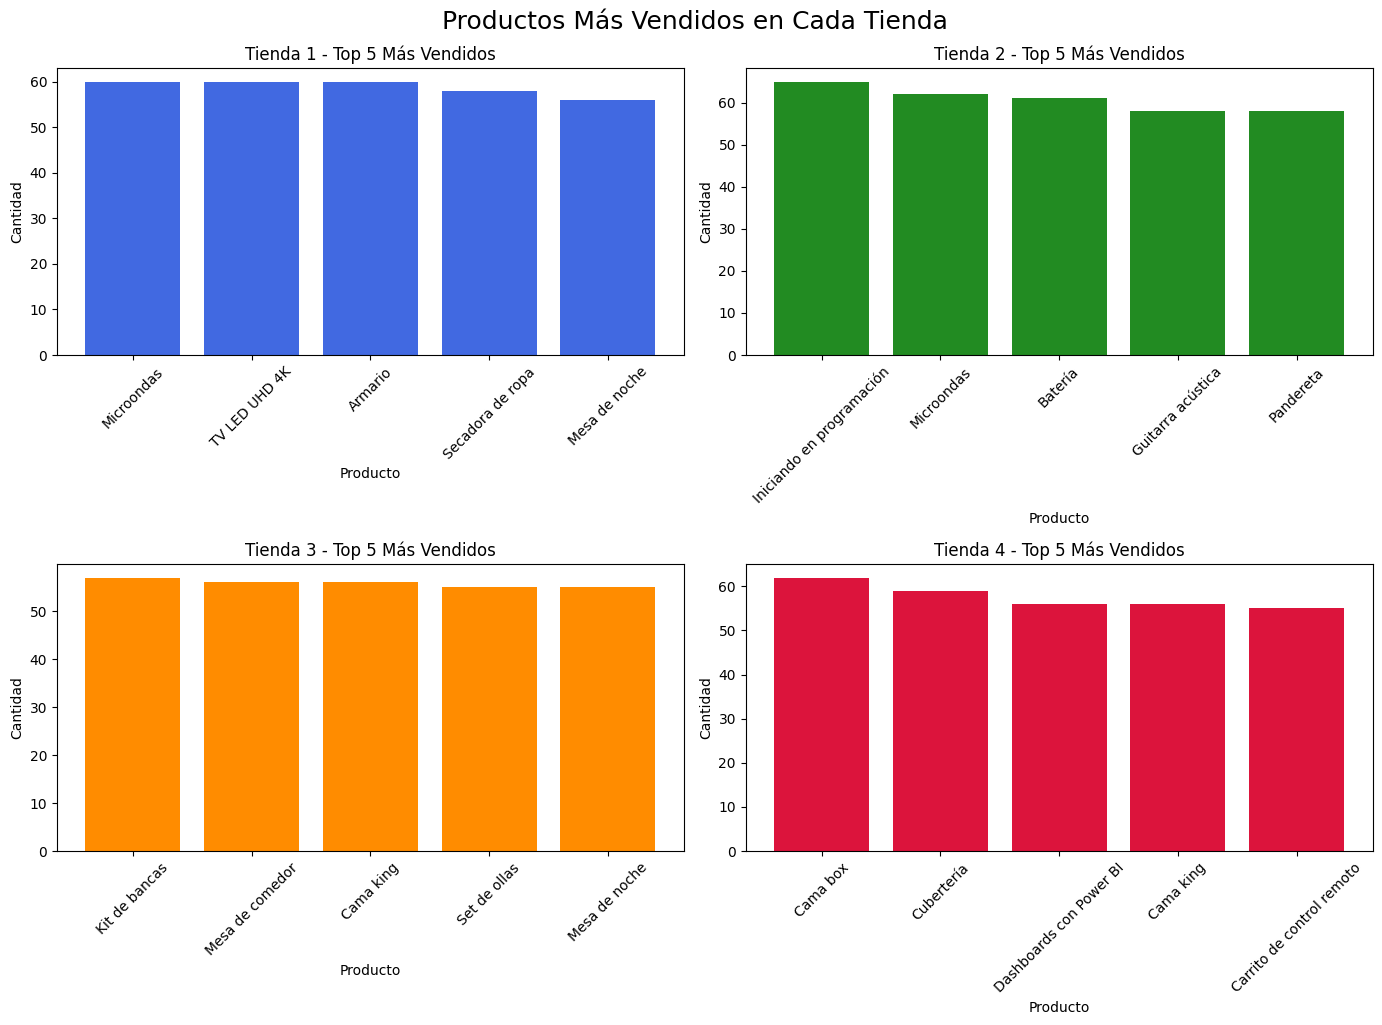

In [ ]:
import matplotlib.pyplot as plt

# Contar ventas de productos
producto_tienda = tienda["Producto"].value_counts()
producto_tienda2 = tienda2["Producto"].value_counts()
producto_tienda3 = tienda3["Producto"].value_counts()
producto_tienda4 = tienda4["Producto"].value_counts()

# Preparar los top 5 productos más vendidos de cada tienda
top_producto_tienda1 = producto_tienda.head(5)
top_producto_tienda2 = producto_tienda2.head(5)
top_producto_tienda3 = producto_tienda3.head(5)
top_producto_tienda4 = producto_tienda4.head(5)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# Tienda 1
axs[0,0].bar(top_producto_tienda1.index, top_producto_tienda1.values, color='royalblue')
axs[0,0].set_title('Tienda 1 - Top 5 Más Vendidos')
axs[0,0].set_xlabel('Producto')
axs[0,0].set_ylabel('Cantidad')
axs[0,0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0,1].bar(top_producto_tienda2.index, top_producto_tienda2.values, color='forestgreen')
axs[0,1].set_title('Tienda 2 - Top 5 Más Vendidos')
axs[0,1].set_xlabel('Producto')
axs[0,1].set_ylabel('Cantidad')
axs[0,1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1,0].bar(top_producto_tienda3.index, top_producto_tienda3.values, color='darkorange')
axs[1,0].set_title('Tienda 3 - Top 5 Más Vendidos')
axs[1,0].set_xlabel('Producto')
axs[1,0].set_ylabel('Cantidad')
axs[1,0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1,1].bar(top_producto_tienda4.index, top_producto_tienda4.values, color='crimson')
axs[1,1].set_title('Tienda 4 - Top 5 Más Vendidos')
axs[1,1].set_xlabel('Producto')
axs[1,1].set_ylabel('Cantidad')
axs[1,1].tick_params(axis='x', rotation=45)

# Ajustar espacios
plt.tight_layout()
plt.suptitle('Productos Más Vendidos en Cada Tienda', fontsize=18, y=1.02)
plt.show()



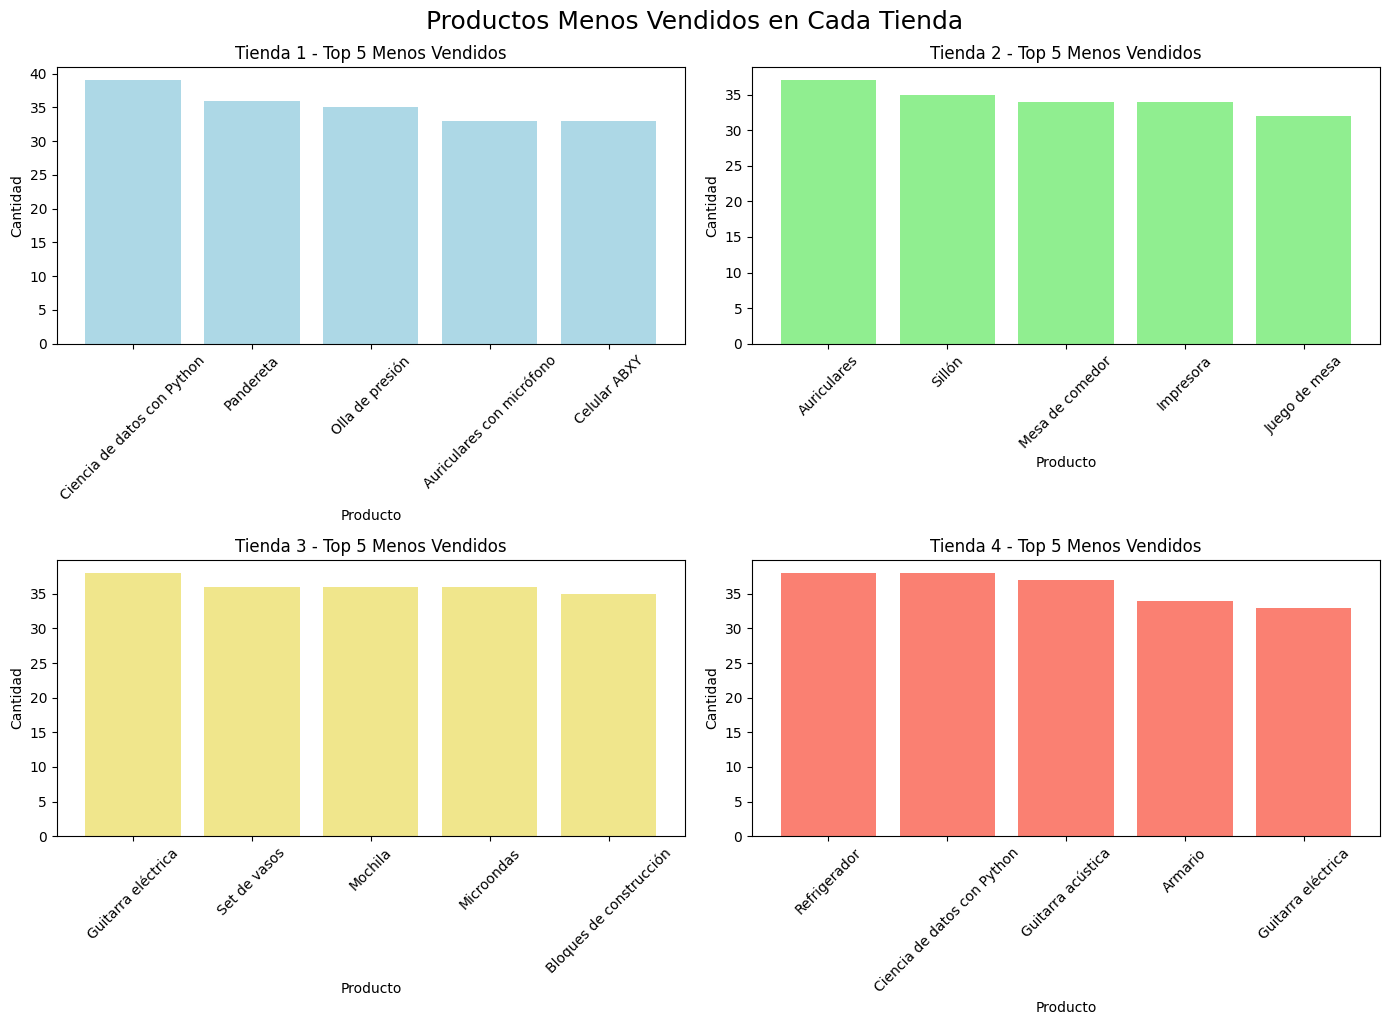

In [ ]:
# Preparar los bottom 5 productos menos vendidos de cada tienda
bottom_producto_tienda1 = producto_tienda.tail(5)
bottom_producto_tienda2 = producto_tienda2.tail(5)
bottom_producto_tienda3 = producto_tienda3.tail(5)
bottom_producto_tienda4 = producto_tienda4.tail(5)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# Tienda 1
axs[0,0].bar(bottom_producto_tienda1.index, bottom_producto_tienda1.values, color='lightblue')
axs[0,0].set_title('Tienda 1 - Top 5 Menos Vendidos')
axs[0,0].set_xlabel('Producto')
axs[0,0].set_ylabel('Cantidad')
axs[0,0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0,1].bar(bottom_producto_tienda2.index, bottom_producto_tienda2.values, color='lightgreen')
axs[0,1].set_title('Tienda 2 - Top 5 Menos Vendidos')
axs[0,1].set_xlabel('Producto')
axs[0,1].set_ylabel('Cantidad')
axs[0,1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1,0].bar(bottom_producto_tienda3.index, bottom_producto_tienda3.values, color='khaki')
axs[1,0].set_title('Tienda 3 - Top 5 Menos Vendidos')
axs[1,0].set_xlabel('Producto')
axs[1,0].set_ylabel('Cantidad')
axs[1,0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1,1].bar(bottom_producto_tienda4.index, bottom_producto_tienda4.values, color='salmon')
axs[1,1].set_title('Tienda 4 - Top 5 Menos Vendidos')
axs[1,1].set_xlabel('Producto')
axs[1,1].set_ylabel('Cantidad')
axs[1,1].tick_params(axis='x', rotation=45)

# Ajustar espacios
plt.tight_layout()
plt.suptitle('Productos Menos Vendidos en Cada Tienda', fontsize=18, y=1.02)
plt.show()


# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
# Calcular el costo de envío promedio por tienda
costo_envio_promedio_tienda = tienda["Costo de envío"].mean()
costo_envio_promedio_tienda2 = tienda2["Costo de envío"].mean()
costo_envio_promedio_tienda3 = tienda3["Costo de envío"].mean()
costo_envio_promedio_tienda4 = tienda4["Costo de envío"].mean()

# Mostrar resultados
print(f"Costo de envío promedio Tienda 1: ${costo_envio_promedio_tienda:.2f}")
print(f"Costo de envío promedio Tienda 2: ${costo_envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio Tienda 3: ${costo_envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio Tienda 4: ${costo_envio_promedio_tienda4:.2f}")


Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


In [ ]:
# borrador

ganancia_tienda = tienda["Costo de envío"].iloc[0] - tienda["Precio"].iloc[0]
ganancia_tienda2 = tienda2["Costo de envío"].iloc[0] - tienda2["Precio"].iloc[0]
ganancia_tienda3 = tienda3["Costo de envío"].iloc[0] - tienda3["Precio"].iloc[0]
ganancia_tienda4 = tienda4["Costo de envío"].iloc[0] - tienda4["Precio"].iloc[0]

print(f"Ganancia Tienda 1: ${ganancia_tienda:.2f}")
print(f"Ganancia Tienda 2: ${ganancia_tienda2:.2f}")
print(f"Ganancia Tienda 3: ${ganancia_tienda3:.2f}")
print(f"Ganancia Tienda 4: ${ganancia_tienda4:.2f}")


Ganancia Tienda 1: $-157400.00
Ganancia Tienda 2: $-268300.00
Ganancia Tienda 3: $-1218500.00
Ganancia Tienda 4: $-1028800.00


# Informe final

El propósito de este análisis es ayudar al Sr. Juan a tomar una decisión informada sobre en qué tienda debe vender sus productos, considerando diversos factores clave que impactan directamente sobre la rentabilidad y la satisfacción del cliente. Para ello, se analizaron los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo de envío promedio en las cuatro tiendas.

El análisis busca identificar cuál de las tiendas presenta las mejores oportunidades de negocio, basándonos en la rentabilidad, la satisfacción del cliente y los costos asociados. A continuación, presento los resultados del análisis.


**Ingresos totales por tienda**

El análisis de los ingresos totales por tienda nos muestra que cada una tiene un rendimiento diferente, lo cual es fundamental para evaluar cuál ofrece el mayor potencial de ventas. A continuación, se muestran los ingresos totales de cada tienda:

* Tienda 1: $1,150,880,400.00

* Tienda 2: $1,116,343,500.00

* Tienda 3: $1,098,019,600.00

* Tienda 4: $1,038,375,700.00

Se puede observar que Tienda 1 es la que presenta los ingresos más altos, lo cual indica un mayor volumen de ventas en comparación con las otras tiendas.

**Calificaciones Promedio de los Clientes por Tienda**

Las calificaciones promedio son un indicador clave de la satisfacción del cliente. Aquí están las calificaciones promedio de las tiendas:

* Tienda 1: 3.98
* Tienda 2: 4.04
* Tienda 3: 4.05
* Tienda 4: 4.00

En este análisis podemos observar que la tienda 3 recibe la más alta calificación del mercado por parte de la satisfacción de los clientes sobresaliendo con un promedio de 4.05. Siguiendo la tienda 2 con una calificación de 4.04, continuando con la tienda 4 con una calificación de 4.00 y la tienda 1 recibe la calificación más baja con 3.98, que puede indicarnos que los clientes no están completamente satisfechos con los productos o el servicio.

**Costo de Envió Promedio de cada tienda**

El costo de envío es un factor importante a considerar, ya que influye directamente en el precio final de los productos y en la satisfacción del cliente.

* Tienda 1: $26018.61

* Tienda 2: $25216.24

* Tienda 3: $24805.68

* Tienda 4: $23459.46

En este caso, la Tienda 4 tiene un costo de envío relativamente bajo, lo cual es un punto a favor, ya que reduce los gastos adicionales para el cliente. Sin embargo, la Tienda 1 presenta el costo de envío más alto, lo cual podría ser una barrera para las ventas.

Después de analizar todos los factores clave, mi recomendación es que el Sr. Juan debería considerar vender en la Tienda 4. Las razones principales que respaldan esta recomendación son:

* Alta satisfacción del cliente: Tienda 4 recibe una de las calificaciones más alta (4.00), este indicador es crucial para fomentar la fidelidad y las recomendaciones.

* Ingresos consistentes: Aunque Tienda 1 tiene los ingresos más altos, Tienda 4 presenta un buen equilibrio entre ventas y satisfacción, lo que podría llevar a un crecimiento estable.

* Costo de envío: la tienda 4 tiene el costo de envío más bajo a comparado con las otras tiendas por lo que es una gran oportunidad para explorar estrategias de reducción de costos en este ámbito sin sacrificar la satisfacción del cliente.

Si bien la Tienda 1 cuenta con un rendimiento financiero impresionante, la Tienda 4 se destaca por su mejor calificación de satisfacción, por lo tanto, esta Tienda parece ser la opción más sólida para un negocio exitoso a largo plazo, considerando la satisfacción del cliente y el potencial de crecimiento.